In [1]:
# %pip install pyodbc
# %pip install python-dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pyodbc
from dotenv import dotenv_values
import pyodbc
!pip install missingno
import missingno as msno

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## 2020 AND 2021 DATASETS FROM SQL DATABASE

In [2]:
SERVER='dap-projects-database.database.windows.net'
DATABASE='dapDB'
USERNAME='LP1_learner'
PASSWORD='Hyp0th3s!$T3$t!ng'


In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [4]:
# Creation of connection
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [5]:
connection = pyodbc.connect(connection_string)

In [6]:
query = "SELECT * FROM dbo.LP1_startup_funding2020"

data = pd.read_sql(query, connection)

query = "SELECT * FROM dbo.LP1_startup_funding2021"

data1 = pd.read_sql(query, connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_3052\1545047851.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)
C:\Users\HP\AppData\Local\Temp\ipykernel_3052\1545047851.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1 = pd.read_sql(query, connection)


In [7]:
data = data.drop(columns=['column10'])

In [8]:
data1.head(5)



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [9]:
data.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


In [10]:
data.to_csv('2020dataset.csv', index=False)
data.to_csv('2021dataset.csv', index=False)


## 2019 DATASET FROM ONE DRIVE

In [11]:
filepath = r"C:\Users\HP\OneDrive\First Solo Project\FIRST-PROJECT---CUSTOMER-CHURN-ANALYSIS\startup_funding2019.csv"
data2 = pd.read_csv(filepath)
data2.to_csv('2019dataset.csv', index=False)


In [12]:
filepath = R"C:\Users\HP\OneDrive\First Solo Project\FIRST-PROJECT---CUSTOMER-CHURN-ANALYSIS\startup_funding2018.csv"
data3 = pd.read_csv(filepath)
data3.to_csv('2018dataset.csv',index = False)

In [13]:
data.shape

(1055, 9)

In [14]:
data.describe()


,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


In [15]:
data.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [16]:
data1.shape

(1209, 9)

In [17]:
data1.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [18]:
data2.shape

(89, 9)

In [19]:
data2.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [20]:
data3.shape

(526, 6)

In [21]:
data3.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [22]:
# Aim of this step is to ensure all columns and column headers are the same
data.columns = data.columns.str.replace('What_it_does', 'What it does').str.replace('Company_Brand', 'Company/Brand')
data1.columns = data1.columns.str.replace('What_it_does', 'What it does').str.replace('Company_Brand', 'Company/Brand')
data2.columns = data2.columns.str.replace('Amount($)', 'Amount').str.replace('Company/Brand', 'Company/Brand')


In [23]:
# This steps aims to make changes to the columns of the 2018 dataset to make the columns equal to the of the pther datasets
data3 = data3.rename(columns={
    'Company Name': 'Company/Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company': 'What it does'
})

In [24]:
data3.head(5)

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [25]:
data.head(1)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None


In [26]:
data1.head(1)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A


In [27]:
data2.head(1)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN


In [28]:
data3.head(1)

,Company/Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


### CONCATENATED DATESET


In [29]:

main_df = pd.concat([data, data1, data2, data3], ignore_index=True)

In [30]:
main_df.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [31]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What it does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
dtypes: float64(1), object(8)
memory usage: 202.6+ KB


## CLEANING AMOUNT COLUMN

In [32]:
main_df['Amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

In [33]:
# Function to convert rupees to dollars
def convert_to_dollars(amount):
    if pd.isnull(amount):
        return np.nan
    amount_str = str(amount).replace(',', '').strip()  # Remove commas and strip whitespace
    if amount_str.startswith('₹'):
        try:
            return float(amount_str[1:]) * 0.0146  # Convert Rupees to Dollars
        except ValueError:
            return np.nan
    elif amount_str.startswith('$'):
        try:
            return float(amount_str[1:])  # Keep the dollar amount as is
        except ValueError:
            return np.nan
    else:
        try:
            return float(amount_str)  # Convert to float for other numeric values
        except ValueError:
            return np.nan  # Handle non-numeric values

# Apply the conversion function to the Amount column
main_df['Amount'] = main_df['Amount'].apply(convert_to_dollars)

# Display the cleaned Amount column
print(main_df['Amount'].head(5))

0    200000.0
1    100000.0
2         NaN
3    400000.0
4    340000.0
Name: Amount, dtype: float64


In [34]:
# Calculate the median of the 'Amount' column
median_value = main_df['Amount'].median()

# Fill NaN values with the median
main_df['Amount'] = main_df['Amount'].fillna(median_value)

# Print the unique values again after filling NaNs
print(main_df['Amount'].unique())

[2.0000000e+05 1.0000000e+05 3.0000000e+06 4.0000000e+05 3.4000000e+05
 6.0000000e+05 4.5000000e+07 1.0000000e+06 2.0000000e+06 1.2000000e+06
 6.6000000e+08 1.2000000e+05 7.5000000e+06 5.0000000e+06 5.0000000e+05
 1.0000000e+07 1.4500000e+08 1.0000000e+08 2.1000000e+07 4.0000000e+06
 2.0000000e+07 5.6000000e+05 2.7500000e+05 4.5000000e+06 1.5000000e+07
 3.9000000e+08 7.0000000e+06 5.1000000e+06 7.0000000e+08 2.3000000e+06
 7.0000000e+05 1.9000000e+07 9.0000000e+06 4.0000000e+07 7.5000000e+05
 1.5000000e+06 7.8000000e+06 5.0000000e+07 8.0000000e+07 3.0000000e+07
 1.7000000e+06 2.5000000e+06 4.0000000e+04 3.3000000e+07 3.5000000e+07
 3.0000000e+05 2.5000000e+07 3.5000000e+06 2.0000000e+08 6.0000000e+06
 1.3000000e+06 4.1000000e+06 5.7500000e+05 8.0000000e+05 2.8000000e+07
 1.8000000e+07 3.2000000e+06 9.0000000e+05 2.5000000e+05 4.7000000e+06
 7.5000000e+07 8.0000000e+06 1.2100000e+08 5.5000000e+07 3.3000000e+06
 1.1000000e+07 1.6000000e+07 5.4000000e+06 1.5000000e+08 4.2000000e+06
 2.200

In [35]:
main_df['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05, 3.0000000e+06, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 1.0000000e+07,
       1.4500000e+08, 1.0000000e+08, 2.1000000e+07, 4.0000000e+06,
       2.0000000e+07, 5.6000000e+05, 2.7500000e+05, 4.5000000e+06,
       1.5000000e+07, 3.9000000e+08, 7.0000000e+06, 5.1000000e+06,
       7.0000000e+08, 2.3000000e+06, 7.0000000e+05, 1.9000000e+07,
       9.0000000e+06, 4.0000000e+07, 7.5000000e+05, 1.5000000e+06,
       7.8000000e+06, 5.0000000e+07, 8.0000000e+07, 3.0000000e+07,
       1.7000000e+06, 2.5000000e+06, 4.0000000e+04, 3.3000000e+07,
       3.5000000e+07, 3.0000000e+05, 2.5000000e+07, 3.5000000e+06,
       2.0000000e+08, 6.0000000e+06, 1.3000000e+06, 4.1000000e+06,
       5.7500000e+05, 8.0000000e+05, 2.8000000e+07, 1.8000000e+07,
       3.2000000e+06, 9.0000000e+05, 2.5000000e+05, 4.7000000e

In [36]:
main_df.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [37]:
# Convert the Amount column to float data type
main_df['Amount'] = main_df['Amount'].astype(float)
print(main_df['Amount'].dtype)

print('\n')

main_df['Amount'].unique()

float64




array([2.0000000e+05, 1.0000000e+05, 3.0000000e+06, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 1.0000000e+07,
       1.4500000e+08, 1.0000000e+08, 2.1000000e+07, 4.0000000e+06,
       2.0000000e+07, 5.6000000e+05, 2.7500000e+05, 4.5000000e+06,
       1.5000000e+07, 3.9000000e+08, 7.0000000e+06, 5.1000000e+06,
       7.0000000e+08, 2.3000000e+06, 7.0000000e+05, 1.9000000e+07,
       9.0000000e+06, 4.0000000e+07, 7.5000000e+05, 1.5000000e+06,
       7.8000000e+06, 5.0000000e+07, 8.0000000e+07, 3.0000000e+07,
       1.7000000e+06, 2.5000000e+06, 4.0000000e+04, 3.3000000e+07,
       3.5000000e+07, 3.0000000e+05, 2.5000000e+07, 3.5000000e+06,
       2.0000000e+08, 6.0000000e+06, 1.3000000e+06, 4.1000000e+06,
       5.7500000e+05, 8.0000000e+05, 2.8000000e+07, 1.8000000e+07,
       3.2000000e+06, 9.0000000e+05, 2.5000000e+05, 4.7000000e

## SECTOR CLEANING

In [38]:
main_df["Sector"].sort_values().unique()

array(['3D Printing, Manufacturing, Product Design', 'AI',
       'AI & Data science', 'AI & Debt', 'AI & Deep learning',
       'AI & Media', 'AI & Tech', 'AI Chatbot', 'AI Company',
       'AI Platform', 'AI Robotics', 'AI Startup', 'AI company',
       'AI health', 'AI platform', 'AI startup', 'API platform',
       'AR platform', 'AR startup', 'AR/VR', 'AR/VR startup',
       'Accomodation', 'Accounting, Apps, FinTech',
       'Accounting, Banking, Finance',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Ad-tech', 'Advertisement',
       'Advertising, Artificial Intelligence, Digital Media, iOS, Location Based Services, News, Video, Video on Demand, Video Streaming',
       'Advertising, Consulting, Digital Marketing',
       'Advertising, Human Resources, Marketing',
       'Advertising, Internet, Marketing', 'Advisory firm', 'Aeorspace',
       'Aero company', 'Aerospace',
       'AgTech, B2B, Supply Chain Management', 'Agri tech', 'Agr

In [39]:
# Define your categorization mapping
def categorize_sector(sector):
    if pd.isna(sector):
        return 'Others'
    elif any(keyword in sector for keyword in ['IT', 'Technology', 'Tech']):
        return 'IT & Technology'
    elif any(keyword in sector for keyword in ['Finance', 'Financial', 'Banking']):
        return 'Financial Services'
    elif any(keyword in sector for keyword in ['Healthcare', 'Life Sciences', 'Med']):
        return 'Healthcare & Life Sciences'
    elif any(keyword in sector for keyword in ['Consumer', 'Goods']):
        return 'Consumer Goods'
    elif any(keyword in sector for keyword in ['Business', 'Consulting', 'Services']):
        return 'Business Services'
    elif any(keyword in sector for keyword in ['Media', 'Entertainment', 'Marketing']):
        return 'Media & Entertainment'
    elif any(keyword in sector for keyword in ['Education']):
        return 'Education'
    elif any(keyword in sector for keyword in ['Manufacturing']):
        return 'Manufacturing'
    elif any(keyword in sector for keyword in ['Retail']):
        return 'Retail'
    elif any(keyword in sector for keyword in ['Transportation', 'Logistics', 'Travel']):
        return 'Transportation & Logistics'
    elif any(keyword in sector for keyword in ['Sports']):
        return 'Sports'
    elif any(keyword in sector for keyword in ['Agriculture']):
        return 'Agriculture'
    elif any(keyword in sector for keyword in ['Real Estate']):
        return 'Real Estate'
    elif any(keyword in sector for keyword in ['Travel', 'Tourism']):
        return 'Travel & Tourism'
    elif any(keyword in sector for keyword in ['Energy']):
        return 'Energy'
    else:
        return 'Others'

# Apply the categorization function to the 'sector' column
main_df['Sector'] = main_df['Sector'].apply(categorize_sector)

# Ensure there are no null values
main_df['sector'] = main_df['Sector'].replace(np.nan, 'Others')



In [40]:
main_df['Sector'].fillna('Others', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3052\2159351662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Sector'].fillna('Others', inplace=True)


In [41]:
main_df.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage', 'sector'],
      dtype='object')

In [42]:
main_df.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage', 'sector'],
      dtype='object')

## CLEANING STAGE COLUMN

In [43]:
# Define consolidated funding categories
valid_stages = {
    'Seed Funding': ['Pre-seed', 'Seed', 'Seed Funding', 'Seed Round', 'Seed round', 'Seed+', 'Pre-seed Round', 'Seed Investment'],
    'Series Funding': ['Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series A-1', 'Series B1', 'Series B+', 'Series A+', 'Series D1'],
    'Pre-Series Funding': ['Pre-series A', 'Pre-series B', 'Pre-series C', 'Pre-series', 'Pre Series A'],
    'Bridge Funding': ['Bridge', 'Bridge Round'],
    'Equity Financing': ['Angel', 'Angel Round', 'Private Equity', 'Post-IPO Equity', 'Corporate Round'],
    'Debt Financing': ['Debt', 'Debt Financing', 'Post-IPO Debt'],
    'Other': ['Venture - Series Unknown', 'Grant', 'Secondary Market', 'Non-equity Assistance', 'Funding Round']
}

# Function to clean and categorize the 'Stage' column
def clean_stage(stage):
    if pd.isna(stage):  # Check if the stage is NaN
        return 'Other'  # Categorize nulls as 'Other'
    for category, stages in valid_stages.items():
        if stage in stages:
            return category
    return 'Other'  # Default to 'Other' for any unmatched stages

# Apply the cleaning function to the 'Stage' column
main_df['Stage'] = main_df['Stage'].apply(clean_stage)

# Display the cleaned 'Stage' column
print(main_df['Stage'].unique())


['Other' 'Seed Funding' 'Pre-Series Funding' 'Series Funding'
 'Debt Financing' 'Bridge Funding' 'Equity Financing']


In [44]:
main_df.isnull().sum()

Company/Brand      0
Founded          769
HeadQuarter      114
Sector             0
What it does       0
Founders         545
Investor         626
Amount             0
Stage              0
sector             0
dtype: int64

In [45]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2879 non-null   object 
 4   What it does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2879 non-null   float64
 8   Stage          2879 non-null   object 
 9   sector         2879 non-null   object 
dtypes: float64(2), object(8)
memory usage: 225.1+ KB


<Axes: >

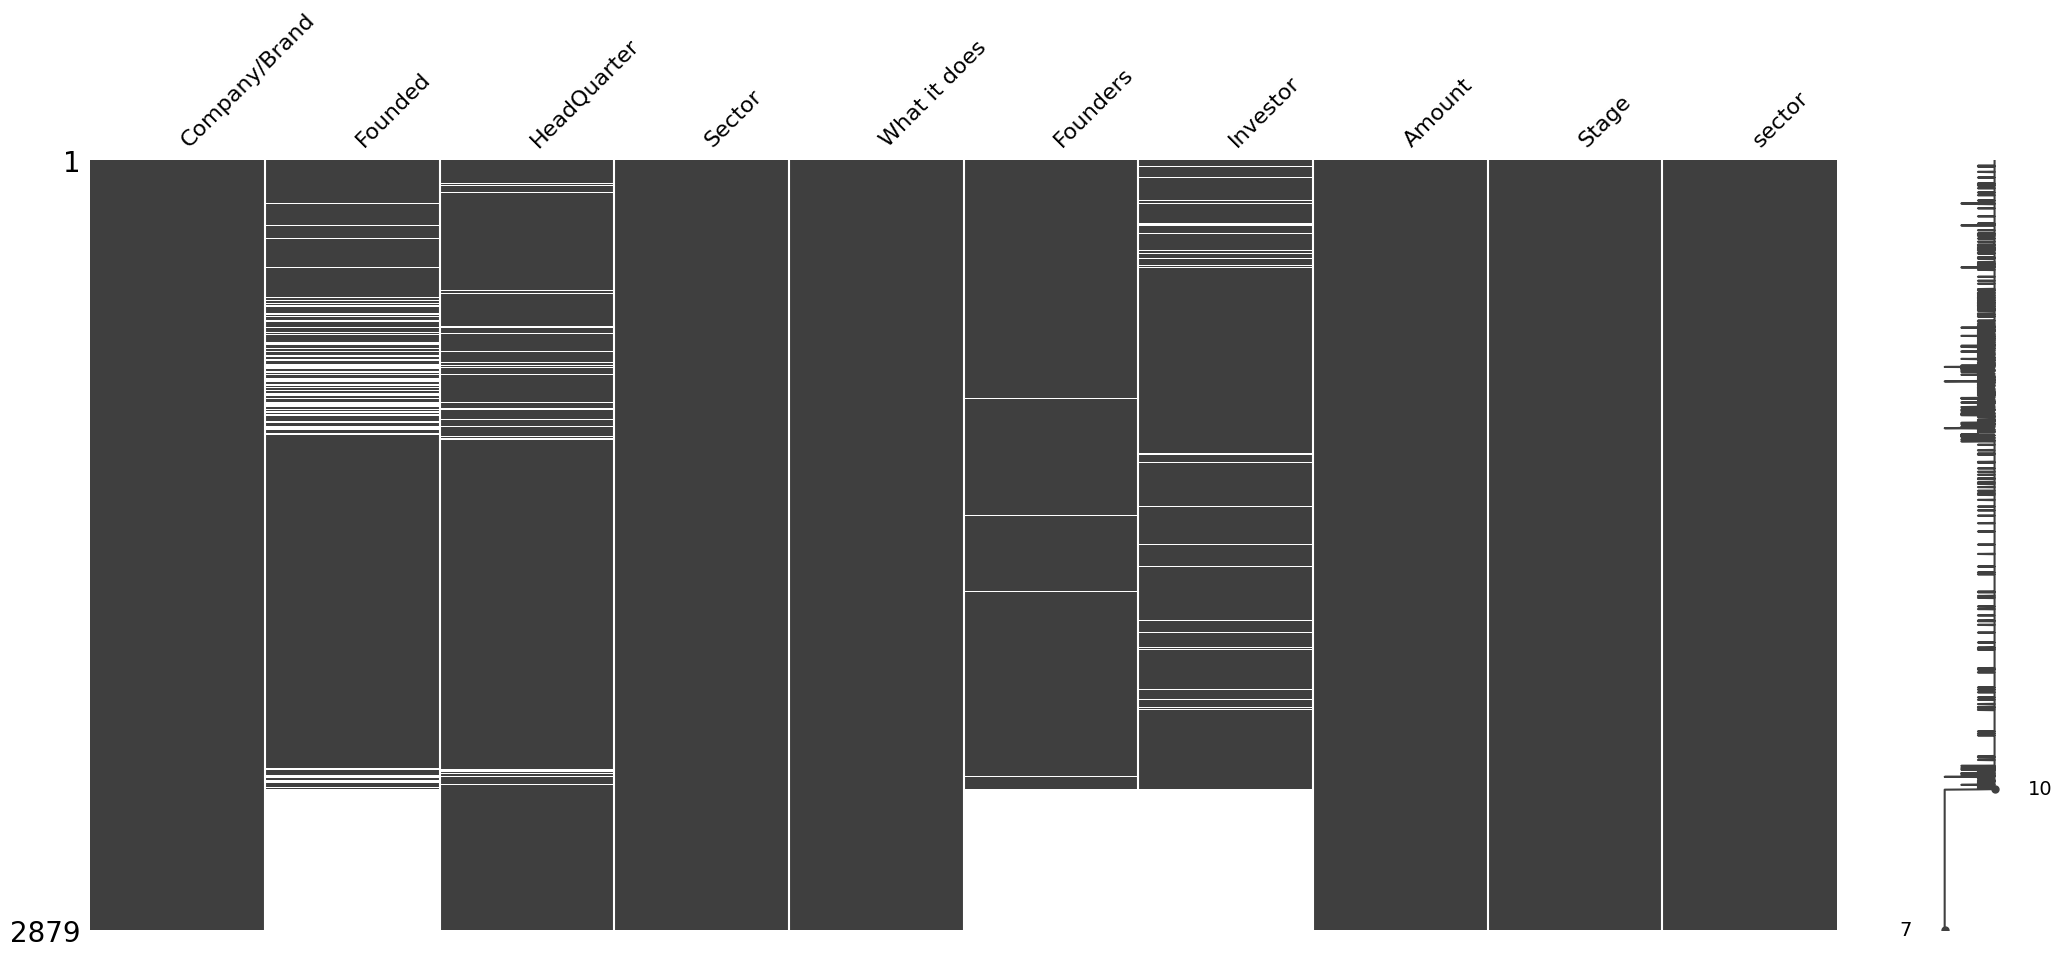

In [46]:
# visualize the null values
msno.matrix(main_df)

## CLEANING THE INVESTOR COLUMN

In [47]:
main_df["Investor"] = main_df["Investor"].fillna("Undisclosed")


In [48]:
main_df.isnull().sum()

Company/Brand      0
Founded          769
HeadQuarter      114
Sector             0
What it does       0
Founders         545
Investor           0
Amount             0
Stage              0
sector             0
dtype: int64

## DROPPING COLUMNS NOT NEEDED

In [49]:
main_df.drop(columns=["Founders"], inplace=True)


In [50]:
main_df.isnull().sum()

Company/Brand      0
Founded          769
HeadQuarter      114
Sector             0
What it does       0
Investor           0
Amount             0
Stage              0
sector             0
dtype: int64

In [51]:
# Rename some columns
main_df.rename(columns={'HeadQuarter': 'Headquarter', 'What it does': 'About', 'sector': 'Sector'}, inplace= True)
main_df.head(2)

,Company/Brand,Founded,Headquarter,Sector,About,Investor,Amount,Stage,Sector
0,Aqgromalin,2019.0,Chennai,IT & Technology,Cultivating Ideas for Profit,Angel investors,200000.0,Other,IT & Technology
1,Krayonnz,2019.0,Bangalore,IT & Technology,An academy-guardian-scholar centric ecosystem ...,GSF Accelerator,100000.0,Seed Funding,IT & Technology


## CLEANING THE FOUNDED COLUMN

In [52]:
main_df['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [53]:
main_df.dropna(subset=['Founded'], inplace=True)

In [54]:
main_df['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978., 1999., 1994., 2005., 1973., 2002., 2004., 2001., 2021.,
       1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [55]:
# Convert the 'founded' column to integers, while handling NaN values
main_df['Founded'] = main_df['Founded'].fillna(0).astype(int)

In [56]:
main_df['Founded'] = main_df['Founded'].astype('int64')


In [57]:
main_df.isnull().sum()

Company/Brand     0
Founded           0
Headquarter      73
Sector            0
About             0
Investor          0
Amount            0
Stage             0
Sector            0
dtype: int64

## CLEANING THE HEADQUATER COLUMN

In [58]:
main_df['Headquarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Frisco, Texas, United States', 'California',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
       'I

In [59]:
main_df.describe()

,Founded,Amount
count,2110.000000,2.110000e+03
mean,2016.079621,1.293743e+08
std,4.368006,3.603818e+09
min,1963.000000,2.000000e+04
25%,2015.000000,1.125000e+06
50%,2017.000000,3.000000e+06
75%,2019.000000,1.000000e+07
max,2021.000000,1.500000e+11


In [60]:
unique_headquarters = main_df['Headquarter'].unique()
print(unique_headquarters)

['Chennai' 'Bangalore' 'Pune' 'New Delhi' 'Indore' 'Hyderabad' 'Gurgaon'
 'Belgaum' 'Noida' 'Mumbai' 'Andheri' 'Jaipur' 'Ahmedabad' 'Kolkata'
 'Tirunelveli, Tamilnadu' 'Thane' None 'Singapore' 'Gurugram' 'Gujarat'
 'Haryana' 'Kerala' 'Jodhpur' 'Jaipur, Rajastan'
 'Frisco, Texas, United States' 'California' 'Dhingsara, Haryana'
 'New York, United States' 'Patna'
 'San Francisco, California, United States' 'San Francisco, United States'
 'San Ramon, California' 'Paris, Ile-de-France, France'
 'Plano, Texas, United States' 'Sydney'
 'San Francisco Bay Area, Silicon Valley, West Coast' 'Bangaldesh'
 'London, England, United Kingdom' 'Sydney, New South Wales, Australia'
 'Milano, Lombardia, Italy' 'Palmwoods, Queensland, Australia' 'France'
 'San Francisco Bay Area, West Coast, Western US'
 'Trivandrum, Kerala, India' 'Cochin' 'Samastipur, Bihar'
 'Irvine, California, United States' 'Tumkur, Karnataka'
 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom'
 'Shanghai, China' 'Jiaxing, 

### The unique dataframe i created is in order to get the list of unique headquarters to make it easier to clean

In [61]:
unique_df = pd.DataFrame(unique_headquarters, columns=['Headquarter'])

unique_df.to_csv('unique_headquarters.csv', index=False)

In [62]:

# Step 2: Remove leading/trailing whitespace and standardize the text
main_df['Headquarter'] = main_df['Headquarter'].str.strip().str.title()

# Step 3: Reset the index (optional, for presentation purposes)
main_df.reset_index(drop=True, inplace=True)

# Step 4: Display the cleaned 'Headquarter' column
print(main_df['Headquarter'])

# Optionally, save the cleaned dataset if needed
# main_df.to_csv('cleaned_main_dataset.csv', index=False)


0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
2105    Bangalore
2106    Bangalore
2107     Gurugram
2108        Delhi
2109        Delhi
Name: Headquarter, Length: 2110, dtype: object


In [63]:
main_df.dropna(subset=['Headquarter'], inplace=True)


In [64]:
main_df.isnull().sum()

Company/Brand    0
Founded          0
Headquarter      0
Sector           0
About            0
Investor         0
Amount           0
Stage            0
Sector           0
dtype: int64

# EXPLORATORY DATA ANALYSIS

# UNIVARIATE DATA ANALYSIS

<Axes: >

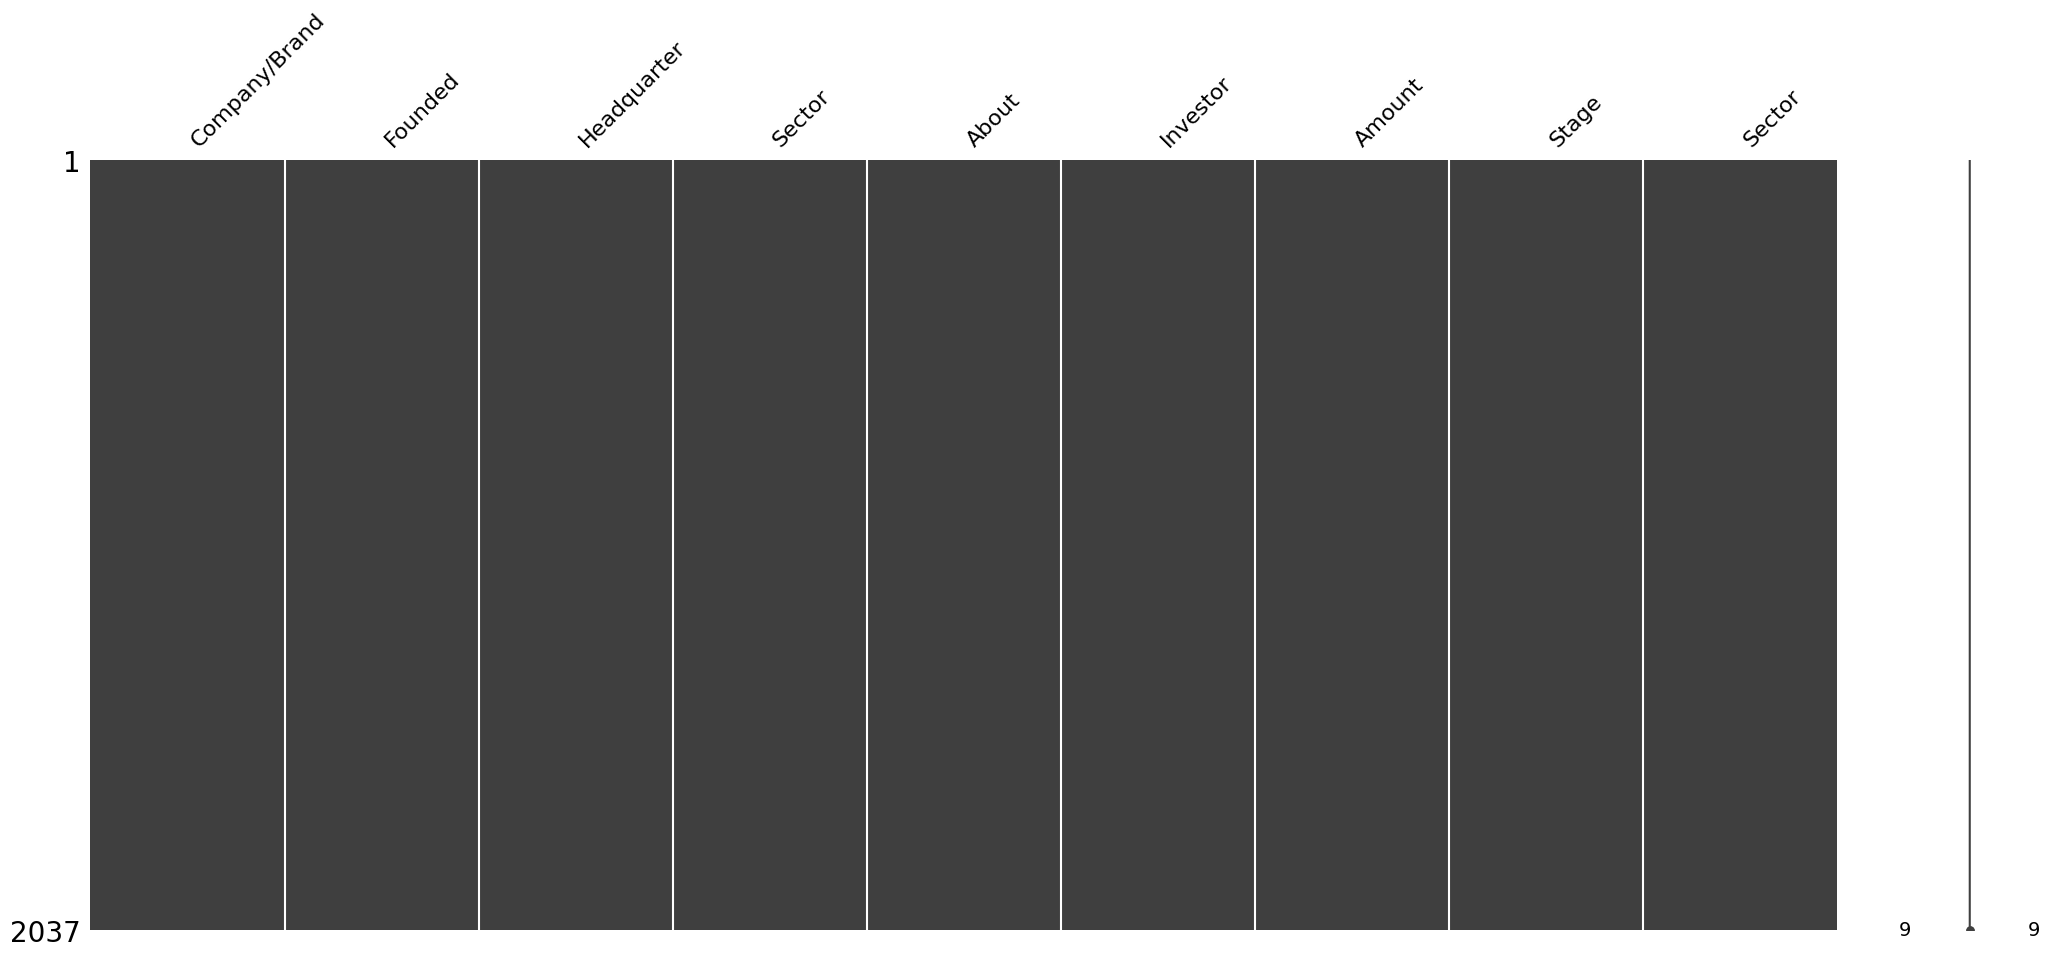

In [65]:
# Visualization of null values across the entire dataset
msno.matrix(main_df)

In [66]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 2109
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2037 non-null   object 
 1   Founded        2037 non-null   int64  
 2   Headquarter    2037 non-null   object 
 3   Sector         2037 non-null   object 
 4   About          2037 non-null   object 
 5   Investor       2037 non-null   object 
 6   Amount         2037 non-null   float64
 7   Stage          2037 non-null   object 
 8   Sector         2037 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 159.1+ KB


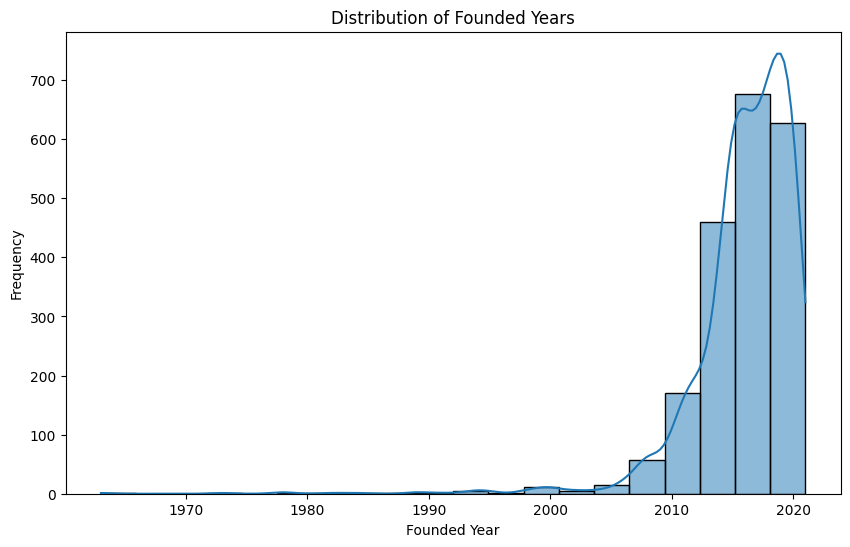

In [67]:
# Founded - Numerical
plt.figure(figsize=(10, 6))
sns.histplot(main_df['Founded'], bins=20, kde=True)
plt.title('Distribution of Founded Years')
plt.xlabel('Founded Year')
plt.ylabel('Frequency')
plt.show()

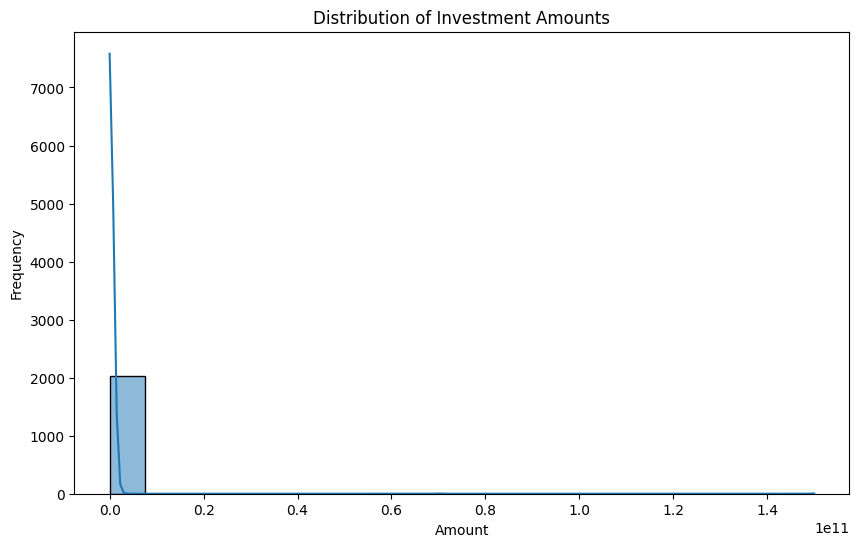

In [68]:
# 5. Amount - Numerical
plt.figure(figsize=(10, 6))
sns.histplot(main_df['Amount'], bins=20, kde=True)
plt.title('Distribution of Investment Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Headquarter
Bangalore                   694
Mumbai                      340
Gurugram                    222
New Delhi                   177
Chennai                      79
                           ... 
Dehradun                      1
Ludhiana                      1
Rajastan                      1
Jiaxing, Zhejiang, China      1
Gandhinagar                   1
Name: count, Length: 119, dtype: int64


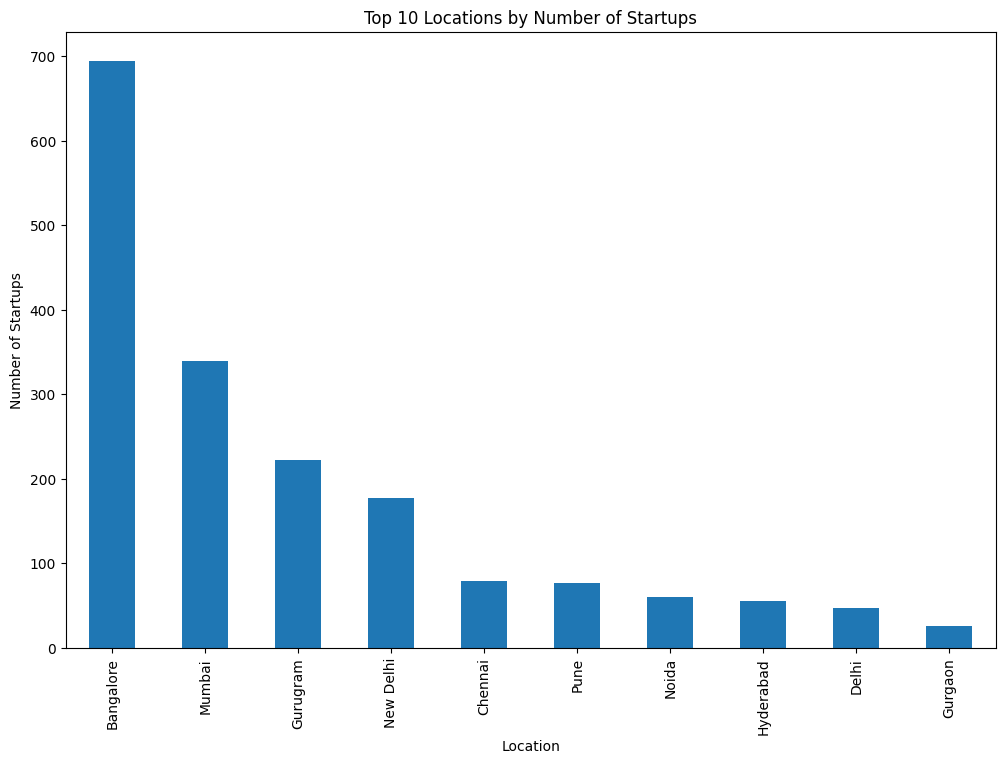

In [69]:
# Frequency count of 'location'

print(main_df['Headquarter'].value_counts())
# Bar plot of location

plt.figure(figsize=(12, 8))
main_df['Headquarter'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Locations by Number of Startups')
plt.xlabel('Location')
plt.ylabel('Number of Startups')
plt.show()

array([[<Axes: title={'center': 'Founded'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

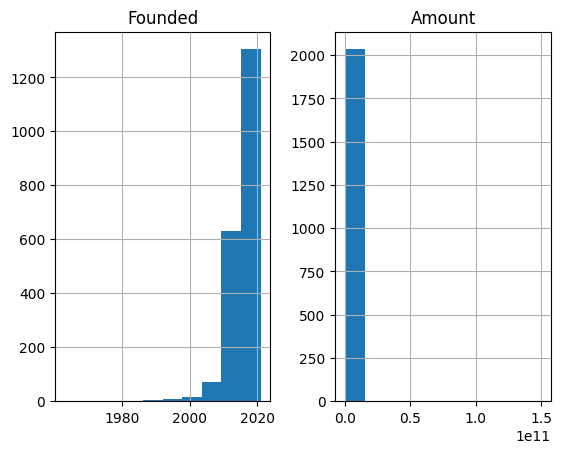

In [70]:
main_df.hist()

<Axes: >

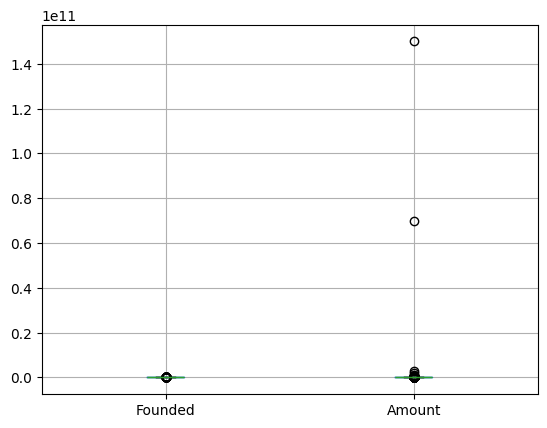

In [71]:
main_df.boxplot()